# Clase: Teorema del límite central e introducción a las pruebas de hipótesis (cont.)

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chisquare
from scipy.stats import f
from scipy import stats

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Importación de datos:
* Source: A. Bhatnagar and V.K. Mehta (2007). "Efficacy of Deltamethrin and Cyfluthrin Impregnated Cloth Over Uniform Against Mosquito Bites,"Medical Journal Armed Forces India, Vol. 63, pp. 120-122.

* Description: Comparison of 5 pretreated patches to reduce mosquito human contact. 

* 30 replicates per treatment.

* Treatments:

1=Odomos, 2=Deltamethrin, 3=Cyfluthrin, 4=D+O, 5=C+O

* Variables: treatment mosq - The number of mosquitoes caught in one hour (Per Man-Hour Mosquito Catch)

In [2]:
# Importamos datos:
df = pd.read_csv("mosquito.csv")
df.head()

,treatment,mosq
0,1,4.50
1,1,10.04
2,1,13.05
3,1,0.26
4,1,10.61


## 2. Pruebas de Hipótesis paras Medias

Sea $\{ X_1, X_2, \ldots, X_n \}$ una muestra aleatoria de tamaño $n$ de una población con función de densidad de probabilidad normal estándar ($N(0, 1)$), donde $\sigma$ es conocida. Sea:
\begin{equation*}
    Z = \frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
\end{equation*}

En este caso cabe aclarar que todas las pruebas estan basadas en muestras aleatorias tomadas de poblaciones con distribuciones normales o, en su caso, son muestras suficientemente grandes ($n > 30$) para utilizar la aproximación normal que nos da el uso del Teorema del Límite Central. Partamos suponiendo que queremos probar alguna de las siguientes hipótesis:
\begin{eqnarray}
    H_0 & : & \mu = \mu_0 \nonumber \\
    H_a & : & 
        \begin{cases}
            \mu \neq \mu_0 \\
            \text{ o } \\
            \mu > \mu_0 \\
            \text{ o } \\
            \mu < \mu_0
        \end{cases}
    \label{H0_Medias}
\end{eqnarray}


Dada la hipótesis nula proponemos las siguientes regiones críticas o de su rechazo respectivas a las hipótesis alternativas en la ecuación anterior:
\begin{equation*}
    \begin{cases}
        | Z | \geq z_{\alpha/2} \\
        \text{ o } \\
        Z \geq z_\alpha \\
        \text{ o } \\
        Z \leq - z_\alpha
    \end{cases}
\end{equation*}


In [3]:
# Establescamos los parámetros de la normal:
Mu = 8.8 
Sigma = 10

# Tamaño:
n = 15

#
Sample = np.random.normal(Mu, Sigma, n)
Sample

array([ 3.39341419, -4.13119546,  8.40184929,  6.35489248,  4.67840579,
        0.54606497, -0.32118317, 15.55106012, 15.10524249,  3.29646195,
        8.85147484, 24.8815068 , 26.40952602,  4.24379372, 10.88721155])

In [4]:
# Media muestral
Sample.mean()

8.54323503975063

In [5]:
# Transformación Z:

Z = (Sample.mean() - Mu)/(Sigma/np.sqrt(n))
Z

-0.09944464149354203

### a) Supongamos que queremos probar que la hipótesis de que la muestra tiene una media IGUAL a la media de donde se extrajo la muestra, contra la alternativa de que la media es:
$$H_0 : \mu = 8.8$$
$$H_1 : \mu \neq 8.8$$

* Retomemos el concepto de región crítica, zona de rechazo o Error Tipo I ($\alpha$). 

* A continuación, grafiquemos una normal estándar.

* Consideremos un Erro Tipo I = 5% o  $\alpha = 0.05$, entonces los valores criticos son:

* $z_{\alpha / 2} = z_{0.025} = 1.96$

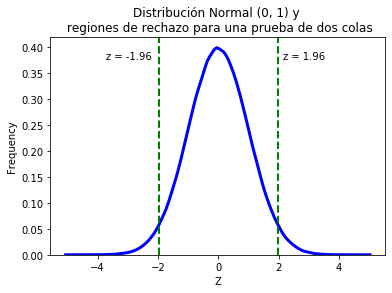

In [6]:
# Datos de una normal estándar:
Normal = np.random.normal(0, 1, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(Normal, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Distribución Normal (0, 1) y \n regiones de rechazo para una prueba de dos colas')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(1.96, color = 'green', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(1.96*1.1, max_ylim*0.9, 'z = {:.2f}'.format(1.96))

plt.axvline(-1.96, color = 'green', linestyle = 'dashed', linewidth = 2)
plt.text(-1.96*1.9, max_ylim*0.9, 'z = {:.2f}'.format(-1.96))


plt.show()

In [7]:
# ¿qué área se acumula hasta 1.96? = F(1.96)
norm.cdf(1.96)

0.9750021048517795

In [8]:
# ¿qué área se acumula después de 1.96?
1 - norm.cdf(1.96)

0.024997895148220484

In [9]:
# ¿qué área se acumula después de 1.96 y antes de -1.96? \alpha
2*(1 - norm.cdf(1.96))

0.04999579029644097

* En una prueba de dos colas, el P-Value es el área la curva normal que se acumula antes y después del valor absoluto de Z.

* Diremos que rechazamos la hipótesis nula si el P-Value es menor al $\alpha$

In [10]:
# P-Value, ¿podemos rechazar la hipótesis nula?
P_Value = 2*(1 - norm.cdf( abs(Z) ))
Z, P_Value

(-0.09944464149354203, 0.9207852396142391)

### b) Supongamos que queremos probar que la hipótesis de que la muestra tiene una media MAYOR a la media de donde se extrajo la muestra, contra la alternativa de que la media es:
$$H_0 : \mu = 8.8$$
$$H_1 : \mu > 8.8$$

* Consideremos un Erro Tipo I = 5% o  $\alpha = 0.05$, entonces los valores criticos son:

* $z_{\alpha} = z_{0.05} = 1.64$

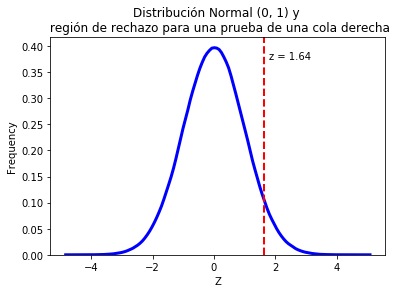

In [11]:
# Datos de una normal estándar:
Normal = np.random.normal(0, 1, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(Normal, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Distribución Normal (0, 1) y \n región de rechazo para una prueba de una cola derecha')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(1.64, color = 'red', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(1.64*1.1, max_ylim*0.9, 'z = {:.2f}'.format(1.64))

plt.show()

* En una prueba de una cola derecha, el P-Value es el área la curva normal que se acumula después del valor de Z.

* Diremos que rechazamos la hipótesis nula si el P-Value es menor al $\alpha$

In [45]:
# ¿podemos rechazar la hipótesis nula?
    
Z

3.453122730210518

### c) Supongamos que queremos probar que la hipótesis de que la muestra tiene una media MENOR a la media de donde se extrajo la muestra, contra la alternativa de que la media es:
$$H_0 : \mu = 8.8$$
$$H_1 : \mu < 8.8$$

* Consideremos un Erro Tipo I = 5% o  $\alpha = 0.05$, entonces los valores criticos son:

* $- z_{\alpha} = - z_{0.05} = - 1.64$

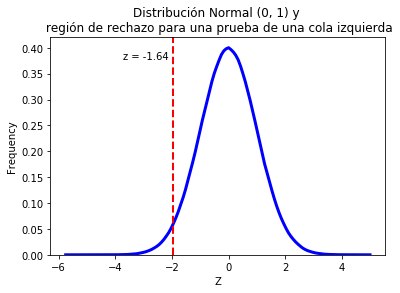

In [13]:
# Datos de una normal estándar:
Normal = np.random.normal(0, 1, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(Normal, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Distribución Normal (0, 1) y \n región de rechazo para una prueba de una cola izquierda')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(-1.96, color = 'red', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(-1.96*1.9, max_ylim*0.9, 'z = {:.2f}'.format(-1.64))

plt.show()

* En una prueba de una cola derecha, el P-Value es el área la curva normal que se acumula antes del valor de Z.

* Diremos que rechazamos la hipótesis nula si el P-Value es menor al $\alpha$

In [46]:
# ¿podemos rechazar la hipótesis nula?

Z

3.453122730210518

¿Qué pasa cuando desconocemos la varianza? En esos casos, al igual que en los intervalos de confianza, utilizaremos una estadística:
\begin{equation*}
    T = \frac{\overline{X} - \mu_0}{\frac{\hat{\sigma}}{\sqrt{n}}} \sim t_{[n - 1]}
\end{equation*}

Donde:
\begin{equation*}
    \hat{\sigma}^2 = \sum_{i = 1}^n \frac{ (x_i - \overline{X})^2 }{n - 1}
\end{equation*}

En estos casos, de forma similar queremos probar las hipótesis de la ecuación mostradas anteriormente, para la cual proponemos las siguientes regiones críticas o de su rechazo, respectivamente,  con las hipótesis alternativas:
\begin{equation*}
    \begin{cases}
        | T | \geq t_{[\alpha/2, n -1]} \\
        \text{ o } \\
        T \geq t_{[\alpha, n -1]} \\
        \text{ o } \\
        T \leq - t_{[\alpha, n -1]}
    \end{cases}
\end{equation*}

In [14]:
# SUPONGAMOS que la media de los datos en la tabla completa es la media poblacional
Mu = df['mosq'].mean()

Mu

7.153333333333333

In [15]:
# Tomemos una muestra de la base
N = 40

Sample = df['mosq'].sample(n = N, replace = True)
Sample.head()

28     8.95
137    4.11
129    1.56
110    5.15
11     5.28
Name: mosq, dtype: float64

Supongamos que queremos probar que la hipótesis de que la muestra tiene una media igual a la media de donde se extrajo la muestra, contra la alternativa de que la media es menor:
$$H_0 : \mu = 7.15$$
$$H_1 : \mu > 7.15$$

* Supongamos una región critica $\alpha = 5\%$

In [16]:
# Media y Desviación Estándar muestrales:
Media = Sample.mean()

Sigma = Sample.std()

# Transformación T:
T = (Media - Mu)/(Sigma/np.sqrt(N))

Media, T

(7.005000000000001, -0.2642815080799198)

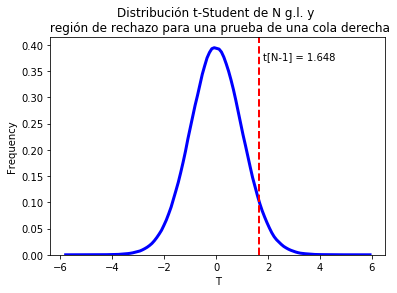

In [17]:
# Datos de una t-Student estándar:
T_Student = np.random.standard_t(N, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(T_Student, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('T')
ax.set_ylabel('Frequency')
ax.set_title('Distribución t-Student de N g.l. y \n región de rechazo para una prueba de una cola derecha')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(1.648, color = 'red', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(1.648*1.1, max_ylim*0.9, 't[N-1] = {:.3f}'.format(1.648))

plt.show()

* El valor de tablas $t_{[\alpha, n - 1]} = t_{[0.05, 39]} = 1.684$

In [18]:
# P-Value, ¿podemos rechazar la hipótesis nula?

P_Value = 1 - t.cdf(abs(T), N - 1)

T, P_Value

(-0.2642815080799198, 0.3964773210907443)

## 3. Prueba de hipótesis para Varianzas
Sea una muestra aleatoria de tamaño $n$ de una población con función de densidad de probabilidad normal.Entonces podemos platear la estructura de las hipótesis de la siguiente forma:
\begin{eqnarray}
    H_0 & : & \sigma^2 = \sigma^2_0 \nonumber \\
    H_a & : & 
        \begin{cases}
            \sigma^2 \neq \sigma^2_0 \\
            \text{ o } \\
            \sigma^2 > \sigma^2_0 \\
            \text{ o } \\
            \sigma^2 < \sigma^2_0
        \end{cases}
    \label{H0_Varianza}
\end{eqnarray}

Para lo cual establecemos la siguiente estadística:
\begin{equation}
    \chi^2 = \frac{ (n - 1) \hat{\sigma}^2 }{ \sigma^2_0 } \sim \chi^2_{[ n - 1 ]}
    \label{Chi_Varianza}
\end{equation}

Donde
\begin{equation*}
    \hat{\sigma}^2 = \sum_{i = 1}^n \frac{ (x_i - \overline{X})^2 }{n - 1}
\end{equation*}

Dada la hipótesis nula proponemos las siguientes regiones críticas o de su rechazo, respectivamente, con las hipótesis alternativas:
\begin{equation*}
    \begin{cases}
        \chi^2 \geq \chi^2_{ [\alpha/2, n-1] } \text{ o } \chi^2 \leq \chi^2_{ [1 - \alpha/2, n-1] } \\
        \text{ o } \\
        \chi^2 \geq \chi^2_{ [\alpha, n-1] } \\
        \text{ o } \\
        \chi^2 \leq \chi^2_{ [1 - \alpha, n-1] }
    \end{cases}
\end{equation*}


In [19]:
# Establescamos los parámetros de la normal:
Mu = 10 
Sigma = 5

# Tamaño:
n = 11

#
Sample = np.random.normal(Mu, Sigma, n)
Sample

array([12.60549715, 24.82619453, 19.56932701,  7.53321189,  8.62705407,
        6.07417589, 16.32890102,  7.61370026, 14.26956871,  4.54530048,
        8.88330154])

In [20]:
# Varianza muestral:

Sigma2 = Sample.std()*Sample.std()
Sigma2

36.083496095697605

Supongamos que queremos probar que la hipótesis de que la muestra tiene una varianza IGUAL a la varianza de donde se extrajo la muestra, contra la alternativa de que la varianza es:
$$H_0 : \sigma^2 = 25$$
$$H_1 : \sigma^2 \neq $$

* Retomemos el concepto de región crítica, zona de rechazo o Error Tipo I ($\alpha$). 

* A continuación, grafiquemos una normal estándar.

* Consideremos un Erro Tipo I = 5% o  $\alpha = 0.05$, entonces los valores criticos son:

* $\chi^2_{ [\alpha/2, n-1] } = \chi^2_{ [0.025, 10] } = 20.50$

* $\chi^2_{ [1 - \alpha/2, n-1] } = \chi^2_{ [0.975, 10] } = 3.25$

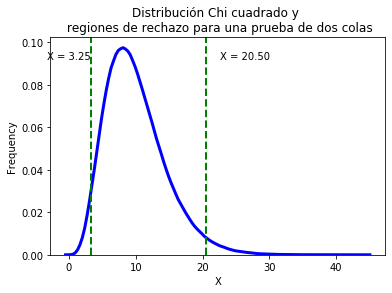

In [21]:
# Datos de una Chi cuadrado:

N = 10

Chisqr = np.random.chisquare(N, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(Chisqr, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('X')
ax.set_ylabel('Frequency')
ax.set_title('Distribución Chi cuadrado y \n regiones de rechazo para una prueba de dos colas')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(20.5, color = 'green', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(20.5*1.1, max_ylim*0.9, 'X = {:.2f}'.format(20.5))

plt.axvline(3.25, color = 'green', linestyle = 'dashed', linewidth = 2)
plt.text(3.25*-1.0, max_ylim*0.9, 'X = {:.2f}'.format(3.25))


plt.show()

In [22]:
# Transformación X: ¿podemos rechazar la hipótesis nula?
X = (n - 1)*Sigma2/25
X

14.433398438279042

## 4. Pruebas para Diferencias de medias
Supongamos 2 muestras aleatorias de tamaños $n_1$ y $n_2$ tomadas de 2 poblaciones normales con medias $\mu_1$ y $\mu_2$, respectivamente. Asumamos en un principio que conocemos las varianzas $\sigma_1^2$ y $\sigma_2^2$. De esta forma planteamos las hipótesis nula e hipótesis alternativa:
\begin{eqnarray}
    H_0 & : & \mu_1 - \mu_2 = \delta \nonumber \\
    H_a & : & 
        \begin{cases}
            \mu_1 - \mu_2 \neq \delta \\
            \text{ o } \\
            \mu_1 - \mu_2 > \delta \\
            \text{ o } \\
            \mu_1 - \mu_2 < \delta
        \end{cases}
    \label{H0_Dif_Medias}
\end{eqnarray}

Utilizaremos la siguiente estadística:
\begin{equation}
    Z = \frac{ \overline{X}_1 - \overline{X}_2 - \delta }{ \sqrt{ \frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2} } }
    \label{Z_Dif_Medias}
\end{equation}

Dada la hipótesis nula proponemos las siguientes regiones críticas o de su rechazo, respectivamente:
\begin{equation*}
    \begin{cases}
        | Z | \geq z_{\alpha/2} \\
        \text{ o } \\
        Z \geq z_\alpha \\
        \text{ o } \\
        Z \leq - z_\alpha
    \end{cases}
\end{equation*}

In [23]:
# Establescamos los parámetros de la normal:
Mu_1 = 8

Mu_2 = 16

Sigma_1 = 10

Sigma_2 = 12

# Tamaño:
n_1 = 15

n_2 = 10

#
Sample_1 = np.random.normal(Mu_1, Sigma_1, n_1)
Sample_2 = np.random.normal(Mu_2, Sigma_2, n_2)

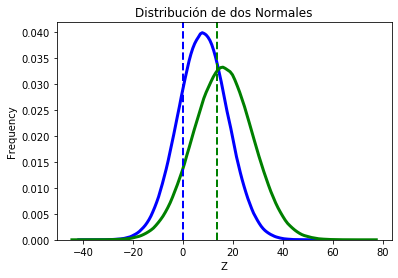

In [24]:
# Datos de una normal estándar:
Normal_1 = np.random.normal(Mu_1, Sigma_1, 1000000)
Normal_2 = np.random.normal(Mu_2, Sigma_2, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(Normal_1, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
#
fig = sns.distplot(Normal_2, hist = False, kde = True,
             color = 'green',
             kde_kws={'linewidth': 3})

ax.set_xlabel('Z')
ax.set_ylabel('Frequency')
ax.set_title('Distribución de dos Normales')

#
min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Colocamos una línea para las medias
plt.axvline(Sample_1.mean(), color = 'blue', linestyle = 'dashed', linewidth = 2) 

plt.axvline(Sample_2.mean(), color = 'green', linestyle = 'dashed', linewidth = 2)


plt.show()

* Supongamos que queremos verificar que:
$$H_0 : \mu_1 - \mu_2 = 6$$
$$H_1 : \mu_1 - \mu_2 > 6$$

In [25]:
# Transformación Z:

Z = (Sample_2.mean() - Sample_1.mean() - 6)/np.sqrt(((Sigma_1^2)/n_1) + ((Sigma_2^2)/n_2))
Z

5.5161983130741055

In [26]:
# P-Value, ¿podemos rechazar la hipótesis nula?
P_Value = 1 - norm.cdf( Z )
Z, P_Value

(5.5161983130741055, 1.732056742476118e-08)

¿Cómo camabia las hipótesis cuando desconocemos las variazas de las poblaciones de donde provienen las muestras? En estos casos utilizaremos una estadística:
\begin{equation}
    T = \frac{ \overline{X}_1 - \overline{X}_2 - \delta }{ \hat{\sigma}_p  \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} } } \sim t_{[ n_1 + n_2 - 2 ]}
    \label{T_Dif_Medias}
\end{equation}

Siempre que las varianzas sean las mismas y donde:
\begin{equation*}
    \hat{\sigma}^2_p = \frac{ (n_1 - 1)\hat{\sigma}^2_1 + (n_2 - 1)\hat{\sigma}^2_2 }{n_1 + n_2 - 2}
\end{equation*}

\begin{equation*}
    \hat{\sigma}^2_i = \sum_{i = 1}^n \frac{ (x_i - \overline{X})^2 }{n - 1}
\end{equation*}

De forrma similar establecemos las reglas de rechazo como:
\begin{equation*}
    \begin{cases}
        | T | \geq t_{[\alpha/2, n_1 + n_2 - 2]} \\
        \text{ o } \\
        T \geq t_{[\alpha, n_1 + n_2 - 2]} \\
        \text{ o } \\
        T \leq - t_{[\alpha, n_1 + n_2 - 2]}
    \end{cases}
\end{equation*}

Así, debemos comparar 2 varianzas de 2 muestras de poblaciones. De esta forma podemos establecer la siguiente estructura de hipótesis:
\begin{eqnarray}
    H_0 & : & \sigma^2_1 = \sigma^2_2 \nonumber \\
    H_a & : & \sigma^2_1 \neq \sigma^2_2 
\end{eqnarray}

Para los cual establecemos la siguiente estadística:
\begin{equation}
    F = \frac{ \frac{\hat{\sigma}^2_1}{\sigma^2_1} }{ \frac{\hat{\sigma}^2_1}{\sigma^2_2} } = \frac{ \hat{\sigma}^2_2 \sigma^2_1 }{ \hat{\sigma}^2_1 \sigma^2_2 } \sim f_{[n_1 - 1, n_2 - 1]}
    \label{F_Varianza}
\end{equation}

Dada la hipótesis nula en la ecuación proponemos las siguientes regiones críticas o de su rechazo:
\begin{equation*}
    F \geq f_{[\alpha/2, n_1 - 1, n_2 - 1]} \text{ si } \hat{\sigma}^2_1 > \hat{\sigma}^2_2 \text{ o } f_{[\alpha/2, n_2 - 1, n_1 - 1]} \text{ si } \hat{\sigma}^2_2 > \hat{\sigma}^2_1 
\end{equation*}


* Supongamos que queremos tomamos dos muestras, una de 41 elementos y otra de 51 elemetos de la base de mosquitos y que:
$$H_0 : \mu_1 - \mu_2 = 0$$
$$H_1 : \mu_1 - \mu_2 \neq 0$$

* Para ello requerimos primero probar si:
\begin{eqnarray}
    H_0 & : & \sigma^2_1 = \sigma^2_2 \nonumber \\
    H_a & : & \sigma^2_1 \neq \sigma^2_2 
\end{eqnarray}

In [27]:
# Retomemos nuestra base de mosquitos:
df.head()

,treatment,mosq
0,1,4.50
1,1,10.04
2,1,13.05
3,1,0.26
4,1,10.61


In [28]:
# Tomemos 5 muestras de la base

group1 = df[df["treatment"] == 1]["mosq"]
group2 = df[df["treatment"] == 2]["mosq"]
group3 = df[df["treatment"] == 3]["mosq"]
group4 = df[df["treatment"] == 4]["mosq"]
group5 = df[df["treatment"] == 5]["mosq"]

In [29]:
# Comparemos 1 y 2:
group1.count(), group2.count()

(30, 30)

* Para las varianzas: Consideremos un Erro Tipo I = 2% o  $\alpha = 0.02$, entonces los valores criticos son:

* $f_{ [\alpha/2, n_1 - 1, n_2 - 1] } = F_{ [0.01, 29, 29] } = 2.39$

* $f_{ [\alpha/2, n_2 - 1, n_1 - 1] } = F_{ [0.01, 29, 29] } = 2.39$

* Para las medias: Consideremos un $\alpha = 0.05$, entonces los valores criticos son:

* $t_{[\alpha/2, n_1 + n_2 - 2 ]} = t_{[0.025, 30 + 30 - 2 ]} = 2.00$

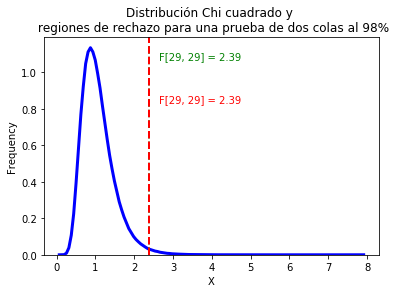

In [30]:
# Datos de una F de Fisher:

N1 = 29

N2 = 29

F = np.random.f(N1, N2, 1000000)

#
fig, ax = plt.subplots()
fig = sns.distplot(F, hist = False, kde = True,
             color = 'blue',
             kde_kws={'linewidth': 3})
ax.set_xlabel('X')
ax.set_ylabel('Frequency')
ax.set_title('Distribución Chi cuadrado y \n regiones de rechazo para una prueba de dos colas al 98%')

min_ylim, max_ylim = plt.ylim() # Extraemos límites del eje Y

# Delimitamos las regiones para una prueba de dos colas
plt.axvline(2.39, color = 'green', linestyle = 'dashed', linewidth = 2) # agregamos línea vertical
plt.text(2.39*1.1, max_ylim*0.9, 'F[29, 29] = {:.2f}'.format(2.39), color = 'green')

plt.axvline(2.39, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.text(2.39*1.1, max_ylim*0.7, 'F[29, 29] = {:.2f}'.format(2.39), color = 'red')


plt.show()

In [31]:
# Varianzas muestrales:

Sigma2_1 = group1.std()*group1.std()

Sigma2_2 = group2.std()*group2.std()

Sigma2_1, Sigma2_2

(11.333240919540229, 11.972856206896553)

In [33]:
# Estadística F: ¿aceptamos o rechazamos la hipótesis nula?

F = Sigma2_2/Sigma2_1

F

1.0564371031990973

In [34]:
# Medias muestrales
Mu_1 = group1.mean()

Mu_2 = group2.mean()

Mu_1, Mu_2

(7.900666666666667, 8.133000000000001)

\begin{equation*}
    \hat{\sigma}_p = \sqrt{ \frac{ (n_1 - 1)\hat{\sigma}^2_1 + (n_2 - 1)\hat{\sigma}^2_2 }{n_1 + n_2 - 2} }
\end{equation*}


In [35]:
# Varianza promedio ponderada:

Sigma = np.sqrt( ((30 - 1)*Sigma2_1 + (30 - 1)*Sigma2_2)/(30 + 30 - 2) )
Sigma

3.4136561870256337

$$T = \frac{ \overline{X}_1 - \overline{X}_2 - \delta }{ \hat{\sigma}_p  \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} } } \sim t_{[ n_1 + n_2 - 2 ]}$$

In [36]:
# Estadística T: ¿qué podemos concluir?

T = (Mu_1 - Mu_2 - 0)/( Sigma*np.sqrt((1/30) + (1/30)) )

P_Value = 2*(1 - t.cdf(abs(T), 30 + 30 - 2))

T, P_Value

(-0.26359512542265934, 0.7930261776385132)

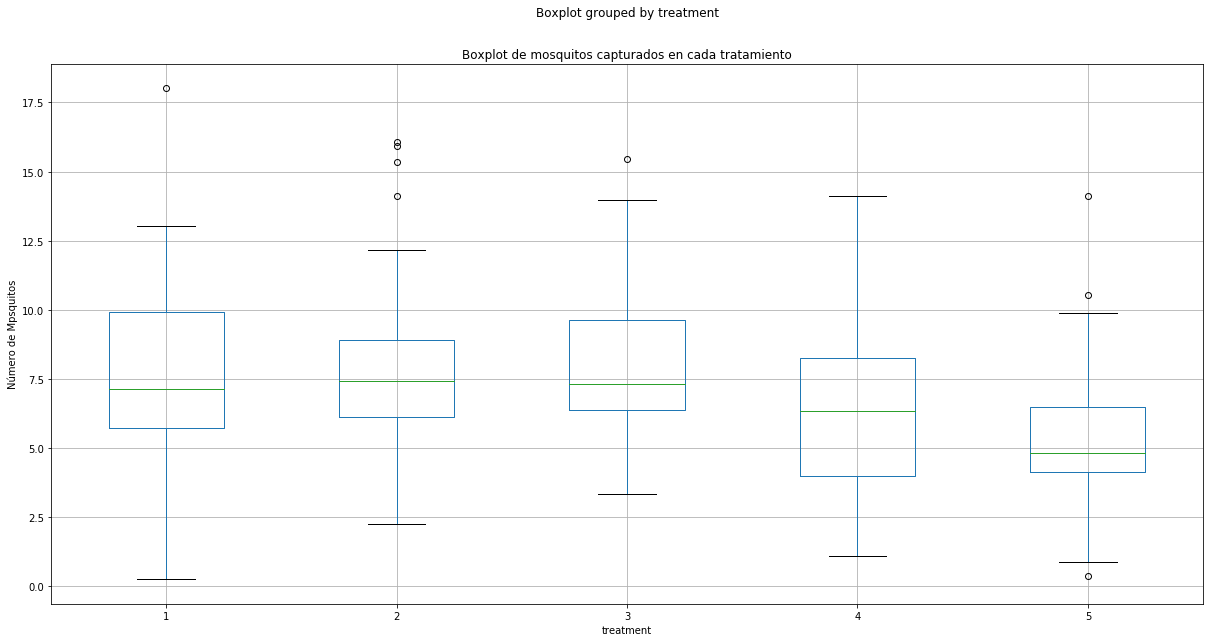

In [37]:
# Create a boxplot to compare means

df.boxplot("mosq", by="treatment", figsize=(20, 10))

plt.title('Boxplot de mosquitos capturados en cada tratamiento')

plt.ylabel('Número de Mpsquitos')

# Save the Figure
#plt.savefig("NAME_FIGURE.png", bbox_inches = 'tight')

# Show the Figure
plt.show()
